In [9]:
%matplotlib inline
import networkx as nx

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>Árboles</p></h2>
  
  <p>
 Como se ha visto en clase, un árbol es un grafo acíclico en el cual, para cualquier pareja de nodos, existe un único camino. De manera similar, un bosque es un grafo no conexo en el que cada componente es un árbol.

<p><center><img src='img/tree.png' width=20%></img></center></p>


<p>El examen consta de un único ejercicio en el cual tendréis que implementar un algoritmo con coste lineal que, dado un grafo, devuelva True si es un árbol (o un bosque) y False en caso contrario. Se valorará la eficiencia de la implementación. Además, es imprescindible que analicéis el coste asintótico.
</p>
</br>
<p>
    <b>Nota: </b> Recuerda que has de emplear la librería de Grafos disponible en networkx (nx.Graph) para representar los grafos. No obstante, no puedes usar ningún algoritmo de esta librería.
</p>

In [16]:
import networkx as nx

"""
Metodo de DFS recursivo que comprueba si se produce algun ciclo y en caso de ser asi retorna False, sino retorna True.
Para realizar esto va comprobando si se quiere visitar algun nodo que ya haya sido visitado exceptuando a traves el cual se ha
llegado a "u" que sera origen

G = Grafo
u = nodo que se quiere consultar
origen = nodo del qual proviene u
visited = dicitonario boolean donde se consulta los elementos visitados

Complejidad: O(2|E|)=O(|E|) 
    Debido a que la suma de los grados de todos los nodos es igual a dos veces el numero de aristas
"""
def dfsRec(G, u, origen, visited):
    visited[u] = True
    isTree = True
    for v in G[u]:
        if v!=origen:
            if not isTree or visited[u]:
                return False
            else:
                isTree= dfsRec(G,v,u,visited)
    return isTree
    
    
"""
Metodo que comprueba si G es un arbol o un bosque y en caso de ser asi retorna True, sino retorna False.
La condicion para que sea arbol es que no tenga ciclos y por tanto que en ninguno de los componentes conexos tenga ciclos.
Para ello se usara el metodo de soporte dfsRec().

G = Grafo

Complejidad: O(|V| + 2|E|)= O(|E|)
    Debido a que primero incializaremos el diccionario con todos los nodos y luego se llamara al DFS, come V es mucho mas
    grande que V normalmente
"""
def is_tree(G):
    visited = {}
    for i in G:
        visited[i] = False
        
    isTree = True
    for i in G:
        #Si El grafo tiene un ciclo en algun componente conexo eso significara que no podra ser un arbol por mucho mas que lo
        #consultemos y por tanto podemos devolver True
        if not isTree:
            return False
        if not visited[i]:
            isTree = dfsRec(G, i, None, visited)
    #En caso de se haya consultado el grafo entero y no hayamos encontrado ningun ciclo podremos assegurar que es un arbol o 
    #un bosque
    return True

In [20]:
# Auxiliary functions
import matplotlib.pyplot as plt
plot = 0

# Creates a random tree
def random_tree(branching_factor = 3, num_nodes = 15):
    return nx.full_rary_tree(branching_factor,num_nodes)

# Creates random graph (non-tree)
def random_graph(num_nodes = 15, num_edges = 20):
    return nx.gnm_random_graph(num_nodes,num_edges)

# Given two graphs, adds the second one as a new component to the first, resulting in a graph with two components.
def merge_graphs(G1,G2):
    s = len(G1.nodes())
    G1.add_edges_from([(s+edge[0],s+edge[1]) for edge in G2.edges()])
    return G1

# Show Graph
def draw(G,size=7):
    global plot
    plt.figure(plot,(size,size))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G,with_labels=True,pos=pos)
    plot += 1

In [21]:
# TEST YOUR CODE
G1 = random_tree()
print(is_tree(G1)) # Should be True
G2 = random_graph()
print(is_tree(G2)) # Should be False
merge_graphs(G2,G1)
print(is_tree(G2)) # Should be False
merge_graphs(G1,random_tree())
print(is_tree(G1)) # Should be True

# assert Test de 1000 intentos
for i in range(1000):
    G1 = random_tree()
    assert is_tree(G1) 
    G2 = random_graph()
    assert not is_tree(G2)
    merge_graphs(G2,G1)
    assert not is_tree(G2)
    merge_graphs(G1,random_tree())
    assert is_tree(G1)

False
False
False
False


AssertionError: 

# Algoritmos sobre grafos
## Minimum Path


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0- Random Walk</p></h2>
  
  <p>
  La implementación de un algoritmo de random walk es, en este caso, un poco ingenua, ya que la utilizaremos para encontrar un camino entre dos puntos (no hace falta que sea el más corto). 
  </p>
  <p>
  Para el desarrollo de este algoritmo lo único que necesitamos es un nodo inicial y un nodo final. En cada iteración del algoritmo iremos visitando un nodo aleatorio de entre todos los posibles vecinos. El parámetro `repeat` determinará si un nodo que ya ha sido visitado puede volver a ser visitado de nuevo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__repeat__: Booleano indicando si nodos se pueden visitar mas de una vez o no.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [40]:
import random
def random_walk(G, origen, destino, repeat = False):
    path = [origen]
    expanded = 0
    ra = random.choice(list(G.neighbors(origen)))
    current = ra
    
    while destino not in G.neighbors(current):
        if current not in path:
            path.append(current)
            expanded+=1
        
        while ra in path:
            ra = random.choice(list(G.neighbors(current)))
        
        current = ra
        
    if destino is not origen:
        path.append(destino)
        expanded+=1
    
    return{
        'path': path,
        'expanded': expanded
    }

{'expanded': 1, 'path': [1, 8]}

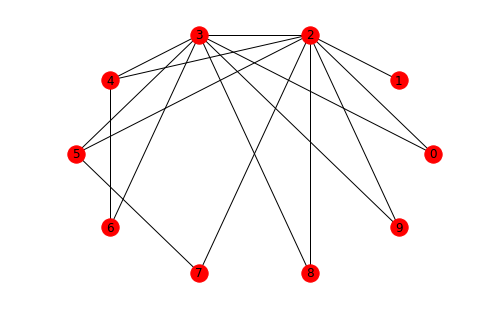

In [41]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(10, 2)
nx.draw_circular(G, with_labels=True)

random_walk(G, 1, 8)


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo <i>Breadth First Search</i> visto en clase. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una cola realizemos una exploración expansiva. Es importante controlar que se trata de un grafo genérico, y no de un arbol, por lo que un mismo nodo nos lo podemos encontrar en varios niveles. En otras palabras, el grafo podría tener ciclos, controlad que cada nodo se visite una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [35]:
from queue import Queue
def bfs(G, origen , destino):
    explored = [] #Llista pels explorats
    queue = [[origen]] #Array per la cua, partint de origen
    expanded = 0 #Expansio
    
    while queue:
        path = queue.pop(0)
        node = path[-1] #Agafem l'ultim element
        
        if node not in explored: #Si el node no esta als explorats
            neighbors = G[node] #Afegim el node a la llista de veins
            
            for nei in neighbors: #Iterem pels veins
                nPath = list(path) #LLista pel cami
                nPath.append(nei) #Afegim el vei a la llista del cami
                queue.append(nPath) #Afegim a la cua 
                if nei == destino:
                    expanded = len(path)
                    return{
                        'path' : nPath,
                        'expanded' : expanded
                    }
            path.append(node)#Si el node esta explorat l'afegim a la llista del cami



{'expanded': 3, 'path': [1, 2, 0, 8]}

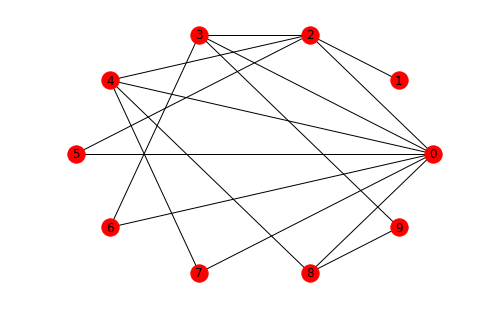

In [36]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(10, 2)
nx.draw_circular(G, with_labels=True)

bfs(G, 1, 8)

In [43]:
from queue import Queue

def bfs_corregido(G, origen, destino):
    visisted, queue= set(),Queue()
    queue.put(origen)
    expanded = 0
    parent = {origen:None}
    #Explorar el grafo
    while not queue.empty():
        node = queue.get() #Sacamos el elemento que mas tiempo lleva en la cola
        if node == destino: break
        if node not in visited:
            visited.add(node) #Afegim el node als visitats
            expanded +=1
            for nei in G.neighbors(node):
                if nei in visited: continue #Evitamos ciclos
                queue.put(nei)
                parent[nei] = node #Para cada node, le apuntos el padre
    #Reconstruimos camino
    node = destino
    path = [node]
    while node != origen:
        node = parent[node]
        path.append(node)
    path.reverse() #Damos la vuelta
    
    return { #retornem el cami i la expansio
        'path' : path,
        'expanded' : expanded  
        
    }
            
        

{'expanded': 2, 'path': [1, 3, 8]}

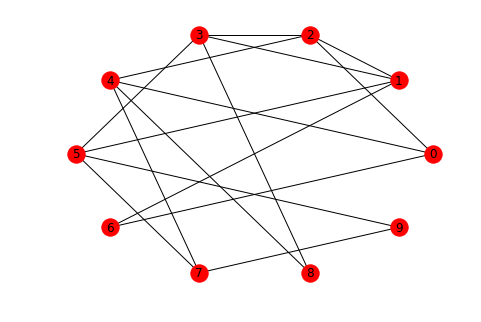

In [44]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(10, 2)
nx.draw_circular(G, with_labels=True)

bfs(G, 1, 8)


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [47]:
import networkx as nx


def dfs(G, origen ,destino):
    for node in G.nodes():
        G.nodes[node]['parent'] = None
        
    explored = [origen]
    path = []
    expanded = 0
    trobat = False
    queue = []
    queue.append(origen)
    
    while queue and not trobat:
        actual = queue.pop()
        neis = [nei for nei in G.neighbors(actual) if nei not in explored]
        expanded +=1
        for node in neis:
            explored.append(node)
            queue.append(node)
            G.nodes[node]['parent']= actual
            if node is destino:
                trobat = True
    if not trobat:
        print("No s'ha trobat")
    
    if trobat:
        actual = destino
        while G.nodes[actual]['parent']:
            path.append(actual)
            actual = G.nodes[actual]['parent']
        path.append(actual)
    path.reverse()
    
       #Retornem el cami i la expansio
    return {
        'path' : path,
        'expanded' : expanded
    }

{'expanded': 11, 'path': [1, 38, 16, 84, 35, 86, 53, 13, 65, 41, 95]}

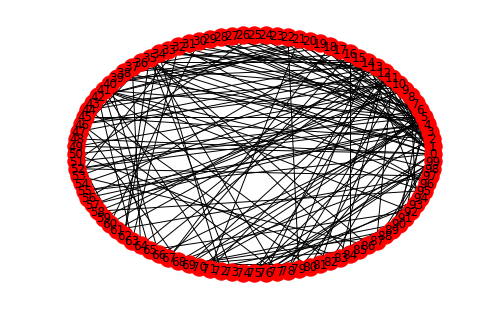

In [49]:
G = nx.generators.barabasi_albert_graph(100, 2)
nx.draw_circular(G, with_labels=True)
dfs(G, 1, 95)

In [50]:
def dfs_corregido(G,origen, destino):
    visited, queue= set(), [origen]
    expanded = 0
    parent = {origen:None}
    
    while queue:
        node = queue.pop()
        if node == destino: break
        if node not in visited:
            visited.add(node)
            expanded+=1
            for nei in G.neighbors(node):
                if nei in visited: continue
                queue.append(nei)
                parent[nei] = node
    
    node = destino
    path = [node]
    while node != origen:
        node = parent[node]
        path.append(node)
    path.reverse()
    
    return {
        'path':path,
        'expanded':expanded
    }
    
    

{'expanded': 6, 'path': [1, 49, 79, 48, 83, 77, 95]}

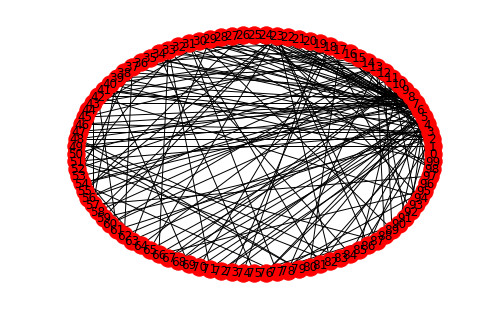

In [52]:
G = nx.generators.barabasi_albert_graph(100, 2)
nx.draw_circular(G, with_labels=True)

dfs_corregido(G, 1, 95)


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [55]:
def cnx(G):
    components =[]
    visited = set()
    for node in G:
        if node in visited: continue
        comp = _dfs(G,node,set())
        visited.update(comp)
        components.append(list(comp))
        
    return components

def _dfs(G,node,verts):
    verts.add(node)
    for neigh in G[node]:
        if neigh not in verts:
            verts = _dfs(G,neigh,verts)
    return verts

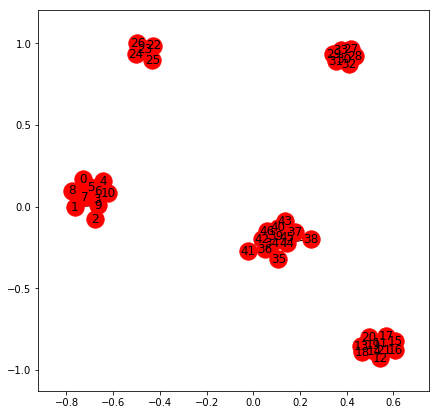

In [56]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
draw(G)

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  <p>
 En esta segunda parte de la práctica se propone que implementéis el algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a> (explicado en teoría) para encontrar el camino más corto entre dos paradas de la red de metro de Londres.
</p>



<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final (ambos nodos, inicio y final, han de estar incluidos en esta lista).</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [25]:
from util import get_subway_graph, draw_subway_graph
from networkx import nx

# Carga del grafo del metro con el que trabajaremos
G, lines = get_subway_graph('csv')

# Algunos nodos
print(list(G.nodes())[:20],'...')
# Algunas aristas
print(list(G.edges())[:20],'...')
print('\n')
print("Ejemplo de arista: ",G.edges[156,167])
print("Ejemplo de nodo: ",G.node[33])

[11, 163, 212, 49, 87, 197, 82, 193, 84, 148, 279, 113, 246, 298, 114, 140, 137, 206, 237, 143] ...
[(11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (163, 82), (212, 192), (49, 87), (49, 197), (49, 151), (87, 279), (87, 255), (87, 285), (197, 192), (197, 107), (197, 151), (82, 193), (193, 278)] ...


Ejemplo de arista:  {'name': 'Metropolitan Line', 'color': '8b004c', 'stripe': 'NULL', 'line': 8, 'distance': 0.006350590523722737}
Ejemplo de nodo:  {'latitude': 51.5269, 'longitude': -0.0247, 'name': 'Bow Road', 'display_name': 'Bow<br />Road', 'zone': 2.0, 'total_lines': 2, 'rail': '0'}


In [76]:
def dijkstra(G, origen, destino, infinity=2**32-1):
    
    for nodes in G.nodes():
        G.node[nodes]['parent']= None #Fem que tots els nodes no tinguin pare
        G.node[nodes]['distanciaTotal']= infinity #Fem que tots els nodes tinguin distancia infinity

    explored=[] #Llista pels explorats
    path = [] #Llista pel cami
    expanded = 0 #Parametre per saber quant s'ha expandit
    trobat = False
    
    G.node[origen]['distanciaTotal']= 0 #La distancia del node origen sera 0
    actual = [0,origen] #Partim del primer node, ponemos el 0 porque si no se sale de indice
    priorQueue = [actual] #Array per la cua começant per l'origen
    
    while priorQueue and not trobat:

        priorQueue.remove(actual) #Eliminem el node actual
        explored.append(actual[1]) #L'afegim a la llista d'explorats, l'origen
        #Creem una llista amb tots els veins que no s'han explorat i veins del node actual
        neis = [nei for nei in G.neighbors(actual[1]) if nei not in explored]
        expanded+=1
        
        for node in neis: #Iterem pels veins
            #Comprovem si podem millorar la distancia desde el node actual, en cas contrari no es fara res
            distanciaTotal = G.node[actual[1]]['distanciaTotal'] + G[actual[1]][node]['distance']
            distActual = G.node[node]['distanciaTotal'] #Distancia actual sera la distancia total que te el node actual
            if distanciaTotal < distActual:#Si la distancia total es menor a la actual
                G.node[node]['distanciaTotal'] = distanciaTotal #Node actual tindra la distancia total
                G.node[node]['parent'] = actual[1] #El pare de l'actual sera l'anterior
                if [distActual, node] in priorQueue:#Si el node que hi ha es el que te distancia actual
                    priorQueue.remove([distActual, node]) #El treiem de la cua
                priorQueue.append([distanciaTotal, node]) #Afegim el de la distancia total
                
        #El node actual sera el minim de la cua.
        minim = 2**32-1
        for minimum in priorQueue:
            if minim > minimum[0]:
                minim = minimum[0]
                node = minimum[1]
        actual = [minim,node]
        trobat = actual[1] is destino


    actual = destino #El desti pasa a ser l'actual
    while G.nodes[actual]['parent']: #Mentre hi hagi pare
        path.append(actual) #Afegim l'actual a path
        actual = G.nodes[actual]['parent'] #El pare de l'actual(5), l'1 pasa a ser l'actual 
    path.append(actual) #Afegim l'actual al path(afegim l1 al path). Ens quedara (5,1)
        
    path.reverse()#Li donem la volta


    return {
        'path': path,
        'expanded': expanded,
        'distance': G.node[destino]['distanciaTotal']
    }

In [75]:
# Prueba tu algoritmo! 
# El camino esperado es: [10, 128, 39, 145, 89, 277, 192, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235]
dijkstra(G, 10, 235)

{'distance': 0.31895111263175857,
 'expanded': 275,
 'path': [10,
  128,
  39,
  145,
  89,
  277,
  192,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235]}

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Matriz de distancias</p></h2>
   <p>
 Se propone el desarrollo de un algoritmo que dado un grafo construya una matriz de $V \times V$ (donde $V$ es el número de vértices del grafo) que contenga la distancia mínima de cada vértice al resto. 
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) sobre el que calcularemos la matriz de distancias. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>El output de la función es un diccionario cuya clave es un nodo (origen) y el valor es otro diccionario con la forma $\{nodo\_destino: distancia\}$.</li>
    </ul>

</p>
</div>


In [26]:
import heapq
"""
Metode que redueix el valor de una clau en un heap i el reajusta perque mantengui las seves propietats
Cost O(n + log n) = O(n)
"""
def upadateHeapMod(heap, key, newValue):
    for i in range(len(heap)):
        if heap[i][1] == key:
            heap[i][0] = newValue
            #Intercambia els elements per conservar la estructura del heap
            while(heap[i//2][0]>heap[i][0]):
                heap[i//2], heap[i] = heap[i], heap[i//2]
                i//=2
            return

"""
Metode que et troba el cami mes curt en un graf amb pes positius respecte al resta
Retorna una llista amb la distancia respecte l'origen i estan ordenades respecte el index en G.nodes()
Cost O(2V + V * (V + log V) + (V + E) * log V) = O(V^2 + E)
"""
def dijkstraMod(G, origen, infinity=float('inf')):
    distance = [] 
    heap = [[0,G.nodes().index(origen)]]
    
    for i in range(len(G)):
        distance.append(infinity)
        heap.append([infinity,i])
    del heap[G.nodes().index(origen)+1]
    distance[G.nodes().index(origen)] = 0 
    
    u = heap[0]
    while len(heap):
        heapq.heapify(heap)
        u = heapq.heappop(heap)
        for v in G.neighbors(G.nodes()[u[1]]):
            if distance[G.nodes().index(v)] > u[0] + G[v][G.nodes()[u[1]]]["distance"]:
                distance[G.nodes().index(v)] = u[0] + G[v][G.nodes()[u[1]]]["distance"]
                upadateHeapMod(heap, G.nodes().index(v), distance[G.nodes().index(v)])
    return distance

"""
Metode que et calcula la matriu de distancias de i a v de forma dist_mat(G)[i][v]
Retorna un diccionari de diccionaris de distancia
Cost O(V * (2V + V * (V + log V) + (V + E) * log V)) = O(V^3 + E)
"""
def dist_mat(G):
    matrix = {}
    for i in G.nodes():
        matrix[i] = {}
        dist = dijkstraMod(G, i)
        for j in range(len(dist)):
            matrix[i][G.nodes()[j]] = dist[j]
    return matrix


In [27]:
dist_mat(G)

AttributeError: 'NodeView' object has no attribute 'index'